# Movie Analysis and Recommendation System

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

# Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [ ]:
movies = pd.read_csv('movies.csv', lineterminator='\n') #Used for machine learning. The genres are strings

In [ ]:
movies.head()

,id,movieId,title,genres,overview,original_language,budget,popularity,production_companies,production_countries,revenue,runtime,vote_average,vote_count
0,862,1,Toy Story,"['Animation', 'Adventure', 'Family', 'Comedy']","Led by Woody, Andy's toys live happily in his ...",en,30000000,93.313,['Pixar'],['United States of America'],373554033,81,7.9,13855
1,8844,2,Jumanji,"['Adventure', 'Fantasy', 'Family']",When siblings Judy and Peter discover an encha...,en,65000000,11.127,"['TriStar Pictures', 'Interscope Communication...",['United States of America'],262797249,104,7.2,8108
2,15602,3,Grumpier Old Men,"['Romance', 'Comedy']",A family wedding reignites the ancient feud be...,en,0,9.122,"['Lancaster Gate', 'Warner Bros. Pictures']",['United States of America'],0,101,6.5,242
3,31357,4,Waiting to Exhale,"['Comedy', 'Drama', 'Romance']","Cheated on, mistreated and stepped on, the wom...",en,16000000,7.614,['20th Century Fox'],['United States of America'],81452156,127,6.4,90
4,11862,5,Father of the Bride Part II,['Comedy'],Just when George Banks has recovered from his ...,en,0,9.890,"['Touchstone Pictures', 'Sandollar Productions']",['United States of America'],76578911,106,6.2,484


Let's check the columns:

> 1. **id**: ID of a movie on TMDB. 
> 2. **movieId**: ID of a movie on MovieLens.
> 3. **title**: The title of the movie.
> 4. **genres** : Genres tag of the movie
> 5. **overview**: A brief introduction of the movie. It is interesting to read.
> 6. **original_language**: The original language of the movie. 
> 7. **budget** : How much money has been put to make the movie.
> 8. **popularity**: It shows how popular the movie is. 
> 9. **production_companies**: Which companies produced this movie. 
> 10. **production_countries**: In which the movie is produced. 
> 11. **revenue**: The revenue of the movie. 
> 12. **runtime**: How long the movie is. 
> 13. **vote_average**: The average vote this movie got. 
> 14. **vote_count**: How many people vote for this movie. 

Then we convert the data type into corresponding data type.

In [ ]:
movies['budget'] = movies['budget'].astype('int64')
movies['popularity'] = movies['popularity'].astype('float')
movies['revenue'] = movies['revenue'].astype('int64')
movies['runtime'] = movies['runtime'].astype('int64')
movies['vote_average'] = movies['vote_average'].astype('float')
movies['vote_count'] = movies['vote_count'].astype('int')

In [ ]:
# print the type of each column
movies.dtypes

id                        int64
movieId                   int64
title                    object
genres                   object
overview                 object
original_language        object
budget                    int64
popularity              float64
production_companies     object
production_countries     object
revenue                   int64
runtime                   int64
vote_average            float64
vote_count                int64
dtype: object

---

# EDA

Now, we have gotten the data in DataFrame. We'd like to have some basic statistics.

In [ ]:
nums_dtype = pd.DataFrame(movies[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']])
nums_dtype.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,2.671700e+04,26717.000000,2.671700e+04,26717.000000,26717.000000,26717.000000
mean,6.460143e+06,7.434112,1.708851e+07,98.424149,6.203526,385.796197
std,2.130586e+07,7.363290,7.435764e+07,27.857292,1.182214,1341.140367
min,0.000000e+00,0.600000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,3.583000,0.000000e+00,88.000000,5.700000,14.000000
50%,0.000000e+00,6.085000,0.000000e+00,97.000000,6.300000,43.000000
75%,9.230000e+05,8.943000,2.046600e+05,109.000000,6.900000,172.000000
max,9.653130e+08,145.168000,2.787965e+09,902.000000,10.000000,28829.000000


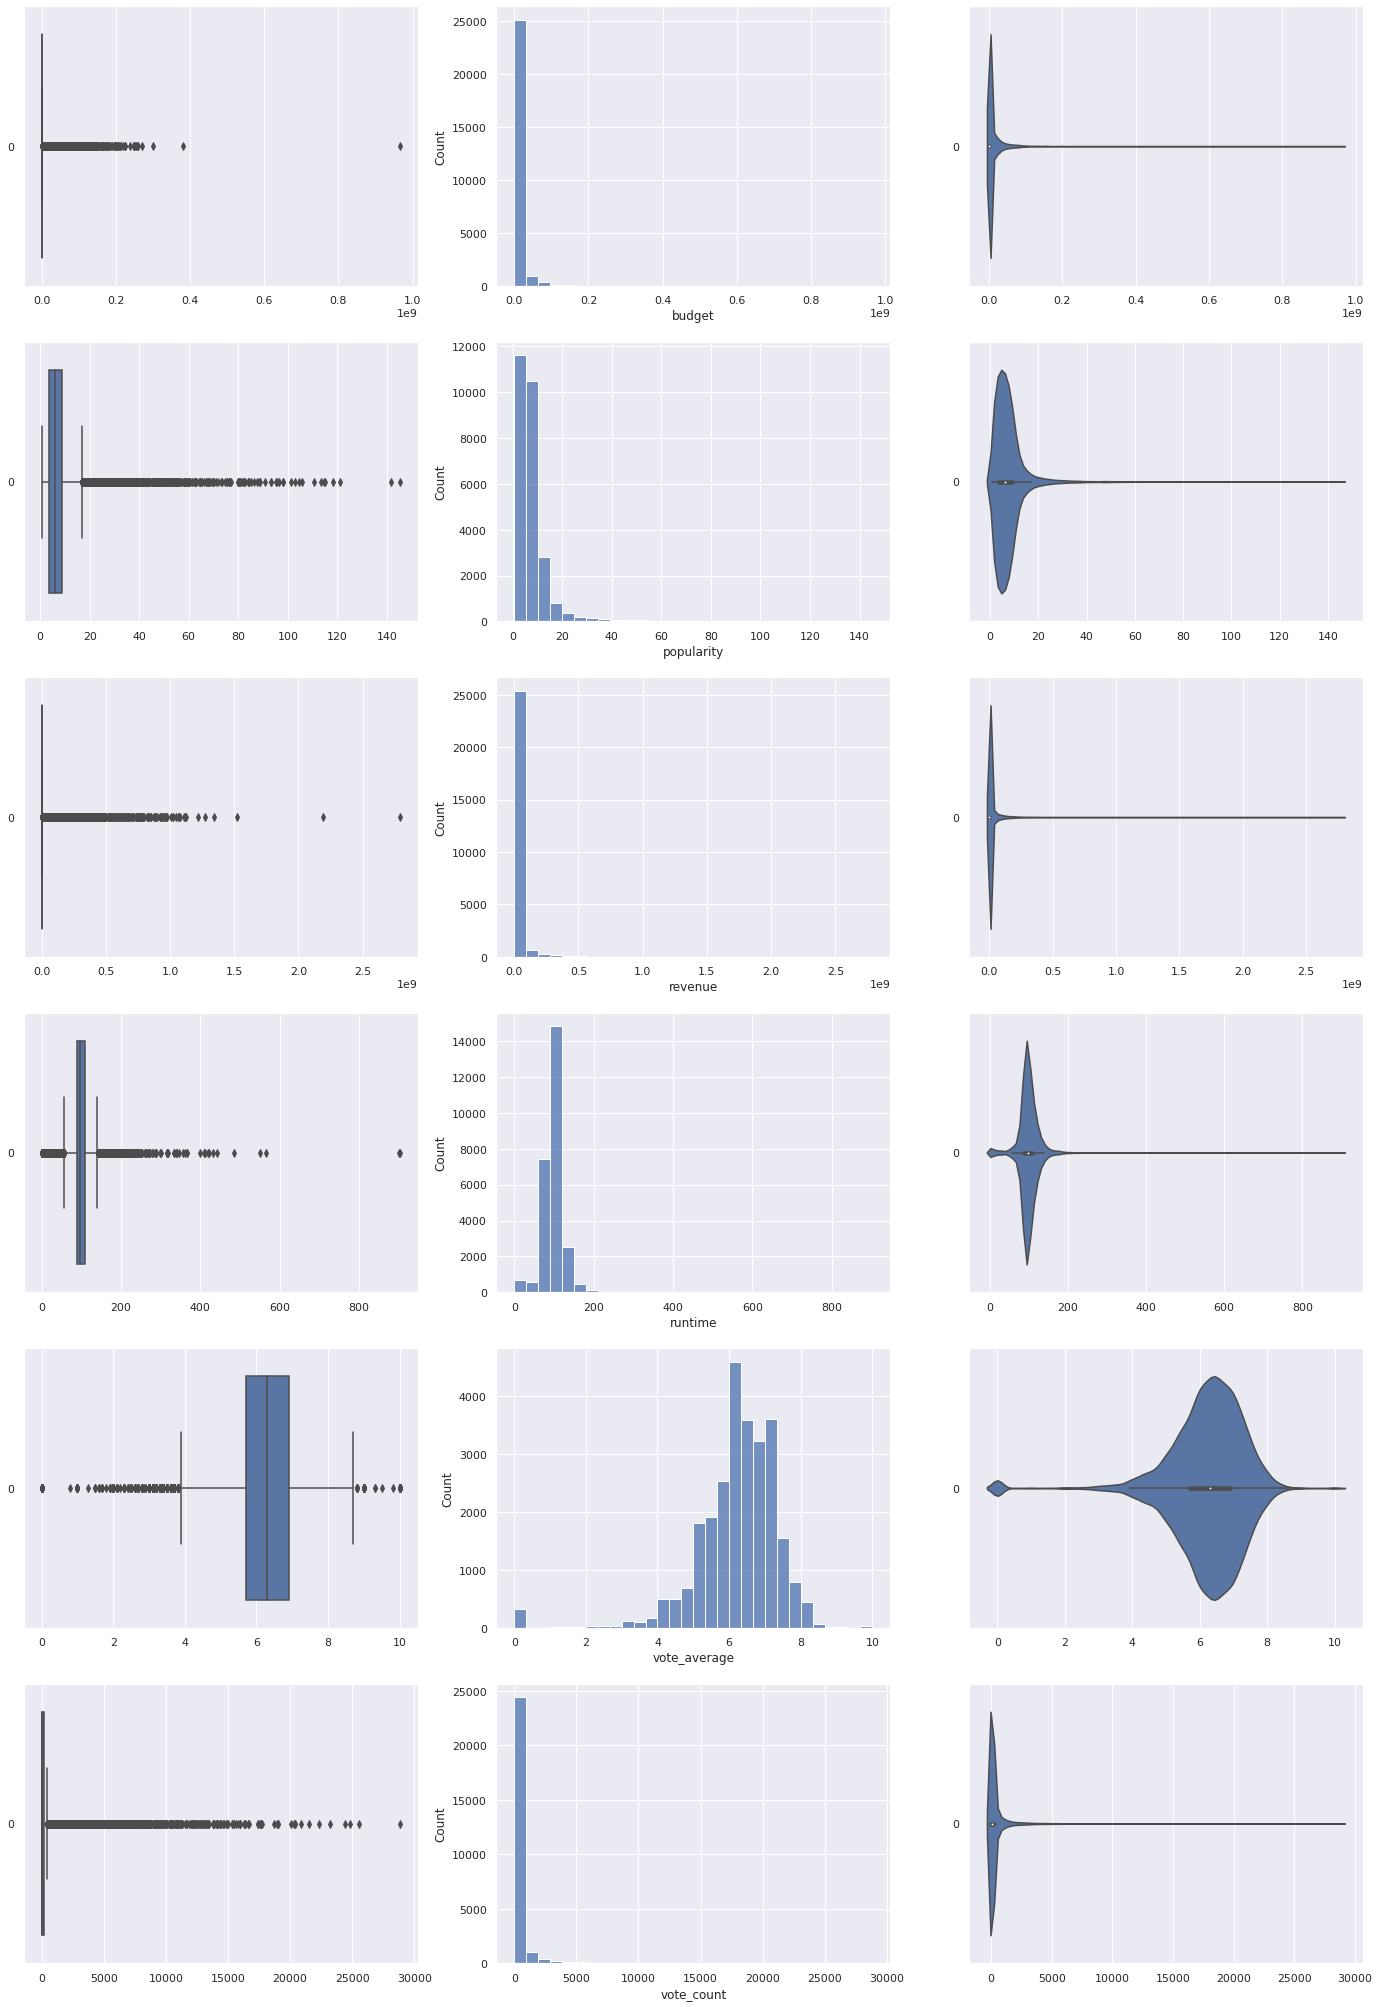

In [ ]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(6, 3, figsize=(24, 36))
count = 0
for var in nums_dtype:
  sb.boxplot(data = nums_dtype[var], orient = "h", ax = axes[count,0])
  sb.histplot(data = nums_dtype[var], bins = 30, ax = axes[count,1])
  sb.violinplot(data = nums_dtype[var], orient = "h", ax = axes[count,2])
  count += 1

The data has many interesting deductions: 
- Firstly, we found that some movies (over 25%) have no budget. 
- For the popularity, it is very different among movies. The most popular movie has popularity of 145 while most of the movies (over 75%) have popularity less than 30. (It is not easy to make a popular movie)
- The revenues distribute not uniformly as well.
- For the runtime, there are some movie whose runtime is 0 because they are initially a Null value; there are also movies with runtime very high. However, there are many of them have pretty high popularity.
- The vote average is quite good. There are some movie got 0 which is weird and we will deal with them later. However, except for them, the distribution is almost a bell line. 

After the discussion above, we found some issues in the data. In this data analysis, we want to find the properties of "normal" movies. So we only focus on the movie with a "normal" runtime (within 300 minutes and not equals to 0). First, we'd like to delete movies whose runtime is more than 300 minutes.

In [ ]:
#delete the rows whose runtime is 0.
movies = movies.drop(movies[movies['runtime']>300].index)
movies = movies.drop(movies[movies['runtime'] == 0].index)
print(movies.dtypes)
print(movies.shape)

id                        int64
movieId                   int64
title                    object
genres                   object
overview                 object
original_language        object
budget                    int64
popularity              float64
production_companies     object
production_countries     object
revenue                   int64
runtime                   int64
vote_average            float64
vote_count                int64
dtype: object
(26513, 14)


In [ ]:
# Extract only the numeric data variables
nums_dtype = pd.DataFrame(movies[["budget", "popularity", "revenue", "runtime", "vote_average", "vote_count"]])

# Summary Statistics for all Variables
nums_dtype.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,2.651300e+04,26513.000000,2.651300e+04,26513.000000,26513.000000,26513.000000
mean,6.504225e+06,7.470407,1.721981e+07,98.776185,6.209263,388.607966
std,2.137253e+07,7.376885,7.462804e+07,24.300473,1.166381,1345.897918
min,0.000000e+00,0.600000,0.000000e+00,1.000000,0.000000,0.000000
25%,0.000000e+00,3.624000,0.000000e+00,88.000000,5.700000,14.000000
50%,0.000000e+00,6.116000,0.000000e+00,97.000000,6.400000,44.000000
75%,1.000000e+06,8.964000,2.433470e+05,109.000000,6.900000,175.000000
max,9.653130e+08,145.168000,2.787965e+09,300.000000,10.000000,28829.000000


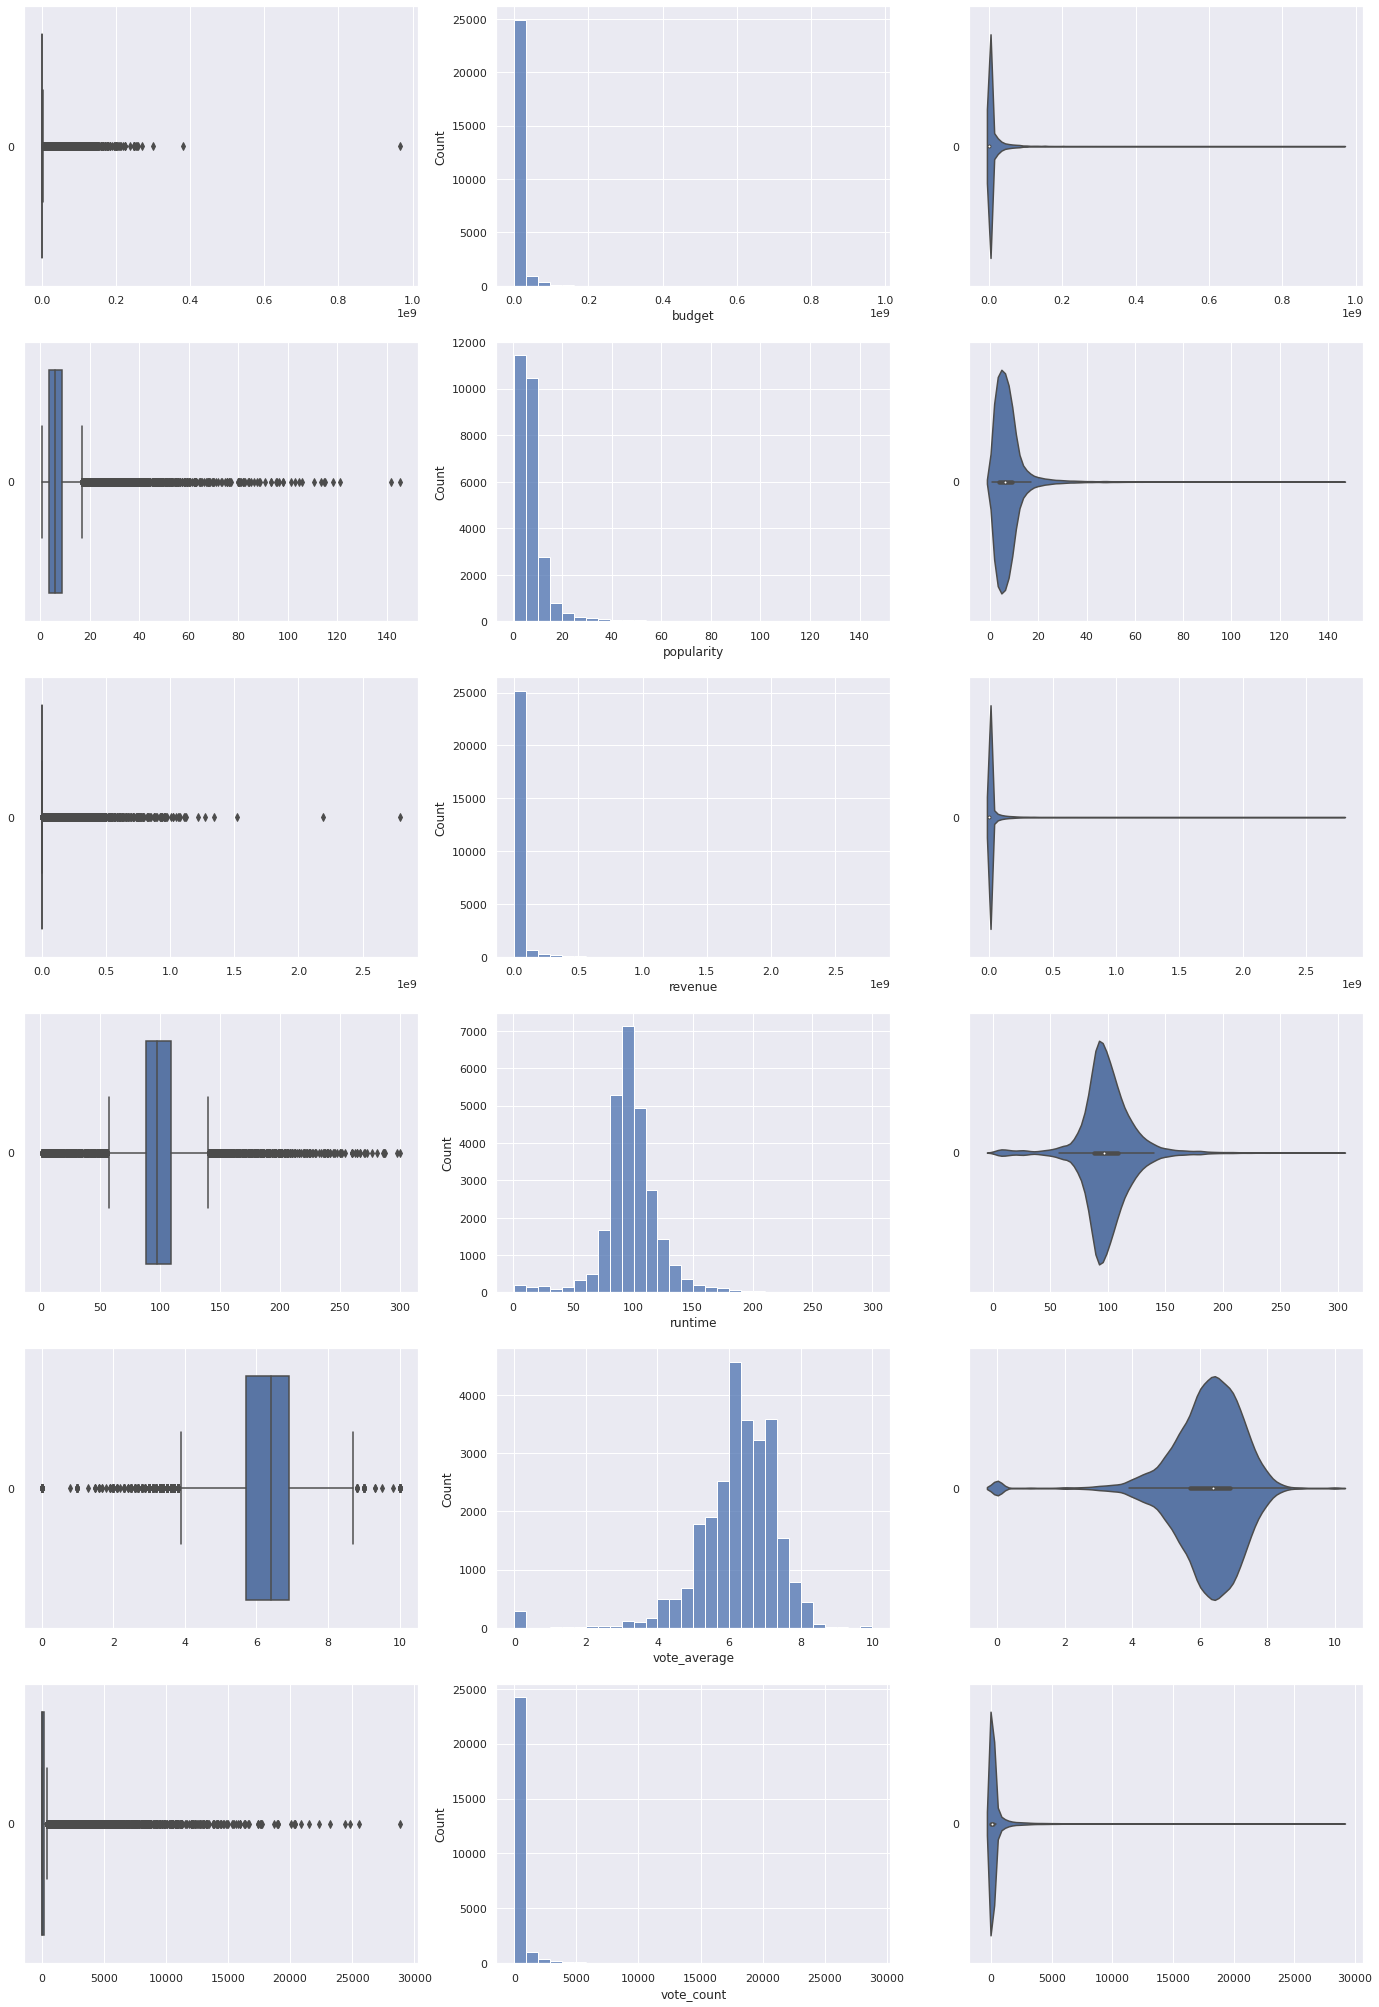

In [ ]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(6, 3, figsize=(24, 36))
count = 0
for var in nums_dtype:
  sb.boxplot(data = movies[var], orient = "h", ax = axes[count,0])
  sb.histplot(data = movies[var], bins = 30, ax = axes[count,1])
  sb.violinplot(data = movies[var], orient = "h", ax = axes[count,2])
  count += 1

In [ ]:
#find out how many 0 are there in each variable.
(nums_dtype.T == 0).astype(int).sum(axis=1)

budget          18727
popularity          0
revenue         19141
runtime             0
vote_average      296
vote_count        296
dtype: int64

In [ ]:
#find out how many movies have 0 vote_average and 0 vote_count simultaneously.
num = 0
for var in nums_dtype.T:
  if nums_dtype['vote_average'][var] == 0 and nums_dtype['vote_count'][var] == 0:
    num += 1

print(num)

296


Previously, we asked a question: why there are so many movies whose vote average is 0?

There are 296 movies whose vote average is 0, and 296 movies who haven't been voted at all. Is there relationship between these two variables? The answer is yes, 296 of the movies with 0 vote average have not been voted at all!

Now we have finished the most basic statistics and start implementing recommendation systems.

---

# Approach I: Content-based Recommendation System

We do not have a quantitative metric to judge our machine's performance so this will have to be done qualitatively. In order to do so, we will follow two steps:
1. First, we use **TfidfVectorizer** function from **scikit-learn**, which transforms text to feature vectors that can be used as input to estimator. 
2. After that we use sklearn's **linear_kernel** to calculate the similarity between two movies.


### Using 'overview' as a recommendation feature.

Are there certain words that feature more often in Movie Overviews? We will attempt to figure this out using a word-cloud visualization.

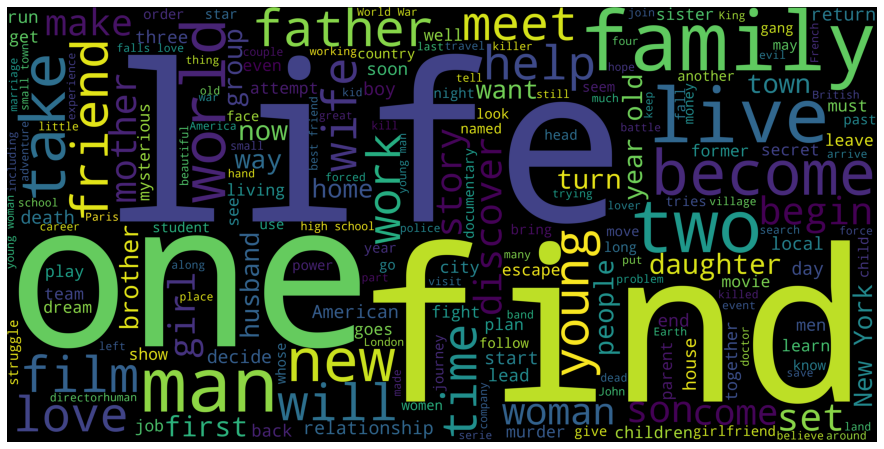

In [ ]:
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie overviews
movies['overview'] = movies['overview'].fillna("").astype('str')
overview_corpus = ' '.join(movies['overview'])
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(overview_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

We can recognize that there are a lot of movie franchises in this dataset, as evidenced by words like *life, find, family*... are among the most commonly occuring words. Now we start building our content-based recommender.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3,  max_features=None, 
                               strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
                               ngram_range=(1, 3), stop_words = 'english')
movies['overview'] = movies['overview'].fillna("").astype('str')

In [ ]:
# Fitting the TF-IDF on the 'overview' text
overview_tfv_matrix = tfv.fit_transform(movies['overview'])
overview_tfv_matrix.shape

(26513, 45850)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

overview_sim = linear_kernel(overview_tfv_matrix, overview_tfv_matrix)
overview_sim[1]

array([0.018483  , 1.        , 0.04202759, ..., 0.        , 0.        ,
       0.        ])

In [ ]:
# Reverse mapping of indices and movie titles
titles = movies.title
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()
indices

title
Toy Story                          0
Jumanji                            1
Grumpier Old Men                   2
Waiting to Exhale                  3
Father of the Bride Part II        4
                               ...  
Military Academy               26712
Fire, Ice & Canned Beer        26713
The Pirates                    26714
The Rose of the Rascal         26715
Innocence                      26716
Length: 26513, dtype: int64

In [ ]:
def get_recommendations(title, cosine_sim):
    try:
        idx = indices[title]
    except:
        print("Film (%s) does not exist in the dataset" % title)
        return
    
    if type(idx) != np.dtype('int64') and len(idx) > 1:
        print("There are several films called (%s)" % title)
        print("Their indices are: ", movies[movies.title == title].index)
        idx = sorted(idx, key=lambda x: movies.iloc[x].popularity, reverse=True)
        idx = idx[0]
        print("For recommendation, I will take the most popular one with id ", movies.iloc[idx].id)

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [ ]:
# Testing our overview-based recommendation system with the movie 'Avatar'
get_recommendations('Avatar', overview_sim)

18148                   The Painting Sellers
21497                              Onnenpeli
25914      The Lumière Brothers' First Films
13555                      Flatfoot in Egypt
25026    Workers Leaving the Lumière Factory
18167                          The Way South
1781                   Passion in the Desert
21816                    My Piece of the Pie
16601         Chronicle of the Years of Fire
25396                                 My Way
Name: title, dtype: object

In [ ]:
# Testing our overview-based recommendation system with the movie 'Toy Story'
get_recommendations('Toy Story', overview_sim)

15221                                    Toy Story 3
2986                                     Toy Story 2
1874                                  Child's Play 2
17036                                      Group Sex
10249                         The 40 Year Old Virgin
23344                    Andy Hardy's Blonde Trouble
485                                           Malice
23963                                      Small Fry
13846                            The Gang's All Here
7594     The First $20 Million Is Always the Hardest
Name: title, dtype: object

In [ ]:
# Testing our overview-based recommendation system with the movie 'The Matrix'
get_recommendations('The Matrix', overview_sim)

6742         Holy Matrimony
17837               11 x 14
21581       Pillow of Death
10227               Un Flic
14031    Death of a Cyclist
40              Richard III
15787             Rogue Cop
22606             Blood Out
10395       Evelyn Prentice
18981              Radio On
Name: title, dtype: object

There is an problem when getting recommendations for the movie 'Toy Story' (a movie for children), movie 'Group Sex' (an adult movie) is recommended. This is definitely not good, so we will try again with the 'genres' the feature.

### Using 'genres' as a recommendation feature.

As we mentioned earlier, we do not have a quantitative metric to judge our machine's performance. Therefore, we will build another recommneder suggest movies that are the most similar to a particular movie based on its genres.

In [ ]:
from ast import literal_eval
movies['genres_str'] = movies['genres'].apply(literal_eval).apply(lambda x: ' '.join(x)) 

In [ ]:
# Fitting the TF-IDF on the 'genres' text
genres_tfv_matrix = tfv.fit_transform(movies['genres_str'])
genres_tfv_matrix.shape

(26513, 1130)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity
genres_sim = linear_kernel(genres_tfv_matrix, genres_tfv_matrix)
genres_sim[1]

array([0.09669655, 1.        , 0.        , ..., 0.06154791, 0.        ,
       0.08395207])

In [ ]:
# Testing our genres-based recommendation system with the seminal movie 'Avatar'
get_recommendations('Avatar', genres_sim)

97                        Heidi Fleiss: Hollywood Madam
106                                             Catwalk
134                    From the Journals of Jean Seberg
159                                               Crumb
189                                            The Show
203                                            Unzipped
242                                         Hoop Dreams
358    The Wonderful, Horrible Life of Leni Riefenstahl
393                                     Frank and Ollie
399    Brother Minister: The Assassination of Malcolm X
Name: title, dtype: object

In [ ]:
# Testing our genres-based recommendation system with the seminal movie 'Toy Story'
get_recommendations('Toy Story', genres_sim)

18795        The Pirates! In an Adventure with Scientists!
12                                                   Balto
859      The Land Before Time III: The Time of the Grea...
1915                                    The Black Cauldron
4378                                  The Land Before Time
5806                            The Wild Thornberrys Movie
10878               Pinocchio and the Emperor of the Night
11741                         The Adventures of Mark Twain
14275                           The Pebble and the Penguin
20842       Lego Batman: The Movie - DC Super Heroes Unite
Name: title, dtype: object

In [ ]:
# Testing our genres-based recommendation system with the seminal movie 'The Matrix'
get_recommendations('The Matrix', genres_sim)

19445    The Strange Case of the End of Civilization as...
21249                                      Murder à la Mod
2506                                      Frogs for Snakes
3723                                     Cecil B. Demented
6640                                             Crimewave
10093                                    The Ferpect Crime
19609                                          The Octopus
20135                                        The Liability
23139                                              Caprice
11976                                         Shoot 'Em Up
Name: title, dtype: object

As you can see, we have lists of recommendation for movies **Avatar**, **Toy Story**, and **The Matrix** from both systems and they are all different. Hence, we conclude the pro and con of using content-based recommendation:
- **Pros**: 
  - The model does not need any data about other users, since the recommendations are specific to a user.
  - The model can capture the specific interests of a user, and can recommend niche items that may not popular but still relevant to the user profile
- **Cons**: 
  - The recommendations is very narrow. For example, if the user like an action movie, the system would never recommend other genres
  - Our system recommend movies based on a given movie, so the recommendations will be the same to every user, this is not good as each user may have different tastes.

---

# Approach II: Collaborative Filtering Recommendation System

The idea of Collaborative Filtering is based on the idea that users similar to me can be used to predict how much I will like a particular product or service those users have experienced but I have not.

For that I will use the **Surprise** library that used extremely powerful algorithms like **Singular Value Decomposition (SVD)** to minimise RMSE (Root Mean Square Error) and give great recommendations.

**Surpsise** is a Python scikit building and analysing recommender systems.

In [ ]:
# Install 'surprise' library, then import essential functions
!pip install surprise
from surprise import Dataset
from surprise import Reader
from surprise import BaselineOnly
from surprise.model_selection import train_test_split

from collections import defaultdict
from surprise.model_selection import KFold
from surprise import KNNWithMeans  #Memory based, Collaborative Based Filtering
from surprise import SVD  #Model Based, Matrix Factorization

from surprise.model_selection import GridSearchCV

from surprise import accuracy

     |████████████████████████████████| 11.8MB 8.0MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617555 sha256=6bcac515c1074d3221bca305c2dcde00c006b2f4847485d09eba80690dfd2276
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
# Get the ratings dataset (from movielens)
ratings = pd.read_csv('ratings.csv')
print(ratings.shape)
ratings.head()

(5000000, 3)


,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [ ]:
# Loads the ratings dataset 
reader = Reader()
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']],reader)
raw_ratings = data.raw_ratings

# A = 75% of the data, B = 25% of the data
threshold = int(.75 * len(raw_ratings))
A_raw_ratings = raw_ratings[:threshold]
B_raw_ratings = raw_ratings[threshold:]

data.raw_ratings = A_raw_ratings # data is not the set A

In [ ]:
# Model based, Matrix Factorization, SVD
print('Grid Search...')
param_grid = {'n_epochs': [5, 10], 
              'lr_all': [0.002, 0.005]}
gs_svd = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs_svd.fit(data) # data is A raw ratings

# Use the algorithm that yields the best rmse
algo_svd = gs_svd.best_estimator['rmse']

Grid Search...


In [ ]:
# retrain on the whole set A
trainset = data.build_full_trainset()
algo_svd.fit(trainset)

# Compute biased accuracy on A
predictions_A = algo_svd.test(trainset.build_testset())
print('Biased accuracy on A:')
# Compute RMSE, MSE, and MAE
accuracy.rmse(predictions_A)
accuracy.mse(predictions_A)
accuracy.mae(predictions_A)
print()

# Compute unbiased accuracy on B
testset = data.construct_testset(B_raw_ratings)  # testset is now the set B
predictions_B = algo_svd.test(testset)
print('Unbiased accuracy on B:')
# Compute RMSE, MSE, and MAE
accuracy.rmse(predictions_B)
accuracy.mse(predictions_B)
accuracy.mae(predictions_B)
print()

Biased accuracy on A:
RMSE: 0.7559
MSE: 0.5713
MAE:  0.5808

Unbiased accuracy on B:
RMSE: 0.9420
MSE: 0.8873
MAE:  0.7282



In [ ]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls


data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], Reader())
kf = KFold(n_splits=5)
cnt = 1

for trainset, testset in kf.split(data):
    algo_svd.fit(trainset)
    predictions = algo_svd.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)
    
    # Precision and recall can then be averaged over all users
    p = sum(prec for prec in precisions.values()) / len(precisions)
    r = sum(rec for rec in recalls.values()) / len(recalls)

    print("Fold:", cnt)
    print("Precision @k:", p)
    print("Recall @k:", r)
    print("F1-Score:", 2 * (p*r)/(p+r))
    print()
    cnt += 1

Fold: 1
Precision @k: 0.628888403899285
Recall @k: 0.24010170174728396
F1-Score: 0.347523349239984

Fold: 2
Precision @k: 0.6294901652547393
Recall @k: 0.24094558614740108
F1-Score: 0.34849872973853724

Fold: 3
Precision @k: 0.6308474510488533
Recall @k: 0.24049407951368892
F1-Score: 0.34823332007508684

Fold: 4
Precision @k: 0.6260324483775491
Recall @k: 0.23861082399021824
F1-Score: 0.3455254279442176

Fold: 5
Precision @k: 0.6293608741641858
Recall @k: 0.24170170113095477
F1-Score: 0.3492690381266965



The metrics scores we got are not very high, we looked for other related works on the internet, and they are likely the same as us. A better solution to improve is using a neural network model, we may try this as further work. Also, we conclude the pro and con of using content-based recommendation:
- **Pros**: 
  - The model can help users discover new interests. In isolation, it may not if know the user is interested in a given item, but model might still recommend it because similar users are interested in that item.
  - To some extent, the system needs only the feedback matrix to train a matrix factorization model. Thus the system does not need contextual feature.
- **Cons**: 
  - Cold-start problem:
    - The predictions of the model for a given (user, item) is the dot product of the corresponding embeddings.
    - If an item is not seen during the training, the system cannot create an embedding for it and cannot query the model with this item.
    
Now we will train the model with the whole dataset for the hybrid approach.

In [ ]:
# Train an SVD algorithm on the whole dataset for the hybrid approach
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], Reader())
trainset = data.build_full_trainset()
algo_svd.fit(trainset)

---

# Approach III: Hybrid Recommendation System

The idea of this approach is: first get top 50 scoring films from the cosine_sim matrix above; then for a particular user, sort them by predicted rating for that user.


In [ ]:
def hybrid(userId, title, number=10):
    try:
        idx = indices[title]
    except:
        print("Film (%s) does not exist in the dataset" % title)
        return
    
    if type(idx) != np.dtype('int64') and len(idx) > 1:
        print("There are several films called (%s)" % title)
        print("Their indices are: ", movies[movies.title == title].index)
        idx = sorted(idx, key=lambda x: movies.iloc[x].popularity, reverse=True)
        idx = idx[0]
        print("For recommendation, I will take the most popular one with id ", movies.iloc[idx].id)

    sim_scores = list(enumerate(genres_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:50]
    movie_indices = [i[0] for i in sim_scores]
    
    top_movies = movies.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'movieId']]
    top_movies['est'] = top_movies['movieId'].apply(lambda x: algo_svd.predict(userId, x).est)
    top_movies = top_movies.sort_values('est', ascending=False).head(number)
    return top_movies

In [ ]:
# Testing our hybrid recommendation system with userId 10 and movie 'Avatar'
hybrid(10, 'Avatar', 10)

,title,vote_count,vote_average,movieId,est
358,"The Wonderful, Horrible Life of Leni Riefenstahl",14,7.3,363,4.139503
1126,American Dream,7,6.9,1169,4.088626
1148,Paris Is Burning,333,8.2,1192,4.077095
2208,Hands on a Hardbody: The Documentary,17,7.9,2330,4.033576
739,Maya Lin: A Strong Clear Vision,6,7.2,759,4.009407
1566,"Fast, Cheap & Out of Control",25,7.3,1649,4.003471
1106,When We Were Kings,151,7.7,1147,3.989339
574,The Celluloid Closet,63,7.4,581,3.958348
1074,Microcosmos,154,7.6,1111,3.949152
159,Crumb,155,7.7,162,3.927692


In [ ]:
# Testing our hybrid recommendation system with userId 10 and movie 'Toy Story'
hybrid(10, 'Toy Story', 10)

,title,vote_count,vote_average,movieId,est
6018,The Black Stallion,183,7.1,6170,3.893322
21774,Frozen,13076,7.3,106696,3.769582
18795,The Pirates! In an Adventure with Scientists!,775,6.4,94833,3.700994
20832,Oblivion Island: Haruka and the Magic Mirror,25,6.6,103190,3.652407
6244,Treasure Island,111,6.6,6405,3.642498
10878,Pinocchio and the Emperor of the Night,19,5.5,45038,3.602216
7816,Kaena: The Prophecy,46,5.7,8537,3.570541
1939,The Incredible Journey,67,6.7,2057,3.564162
1938,In Search of the Castaways,54,6.5,2056,3.536170
15697,Legend of the Guardians: The Owls of Ga'Hoole,1660,6.7,80615,3.530731


In [ ]:
# Testing our hybrid recommendation system with userId 10 and movie 'The Matrix'
hybrid(10, 'The Matrix', 10)

,title,vote_count,vote_average,movieId,est
921,The Thin Man,262,7.6,950,4.186878
7446,After the Thin Man,90,7.4,7834,4.037759
7445,Shadow of the Thin Man,53,7.1,7833,4.000026
4878,Murder by Death,518,7.3,5021,3.969510
6906,A Shot in the Dark,312,7.4,7073,3.928469
11368,It's a Wonderful World,20,6.2,49412,3.817563
10093,The Ferpect Crime,210,6.7,33893,3.811934
5786,Deathtrap,134,6.7,5938,3.721926
19445,The Strange Case of the End of Civilization as...,8,6.2,97726,3.672725
15319,Gumshoe,22,6.4,78982,3.672689
